In [2]:
# run this to make sure we have all necessary SAT problem generating functions available
%run sat_generator.ipynb

In [3]:
import random
import math
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def num_clauses_satisfied(clauses):
    total = 0
    for c in clauses:
        if c.is_satisfied():
            total += 1
    return total

In [5]:
def determine_flip(clauses, var_picked):
    flip_count = {True: 0, False: 0}
    for c in clauses:
        count_false_v = 0
        variable_pairs_in_c = c.variables
        var_neg_map = {}
        for variable, neg in variable_pairs_in_c:
            var_neg_map[variable] = neg
        variables_in_c = list(var_neg_map.keys())
        if var_picked not in variables_in_c:
            continue
        for v in variables_in_c:
            curr_val = v.get_val()
            if var_neg_map[v]:
                curr_val = 1 - v.get_val()
            if curr_val:
                flip_count[False] += 1
                break
            else:
                count_false_v += 1
        if count_false_v == len(variables_in_c):
            flip_count[True] += 1
    sample_list = []
    for k, v in flip_count.items():
        sample_list.extend([k for _ in range(v)])
    if len(sample_list) == 0:
        return np.random.choice([True, False])
    return np.random.choice(sample_list)

In [6]:
def gibbs_solver(s, num_samples):
    # initialize all variables to random values
    Variable.reset_id()
    variables_in_s = s.get_variables()
    clauses_in_s = s.clauses
    num_c_sat_over_time = []

    for v in variables_in_s:
        v.set_val(random.choice([0, 1]))
    
    for t in range(num_samples):
        # pick index i uniformly at random from 1...k
        i = random.randint(0, len(variables_in_s) - 1)
        var_picked = variables_in_s[i]
        # draw a sample a ~ p(x_i' | x_-i^(t))
        c_sat = num_clauses_satisfied(clauses_in_s)
        num_c_sat_over_time += [c_sat]
        flip = determine_flip(clauses_in_s, var_picked)
        # let x(t + 1) = (x1(t), ..., x_(i - 1)(t), a, ..., xk(t))
        if flip:
            var_picked.set_val(1 - var_picked.get_val())
        if s.is_satisfied():
            return s, True, num_c_sat_over_time
    return (s, s.is_satisfied(), num_c_sat_over_time)

In [16]:
factory = SAT_Factory(300, 300, 200, 200)
s = factory.generate_random_instance()

In [17]:
new_s, sat_solved, num_c_sat_over_time = gibbs_solver(s, 10000)
print(len(s.variables))
print(num_c_sat_over_time)

{(x204, False) or (~x174, True) or (x92, True) or (~x153, True) or (~x192, True) or (~x114, True)}
{(x218, True) or (x152, False) or (x63, True) or (~x154, True) or (~x11, False) or (~x213, False) or (~x215, False) or (~x190, False) or (~x61, False) or (~x75, True) or (x43, True) or (~x147, True) or (x30, True) or (x146, False) or (~x90, False) or (x106, True) or (x40, True) or (~x226, True) or (~x149, False)}
{(~x254, True) or (~x257, True) or (x148, False) or (x36, False) or (x59, False) or (~x68, False)}
{(x216, False) or (~x77, True) or (~x198, False) or (~x87, True) or (x34, False) or (~x210, True) or (x182, True) or (~x50, True) or (x224, True) or (x199, True) or (x156, True) or (x247, False) or (x223, False) or (x105, False) or (~x135, False) or (~x176, True) or (x237, False) or (~x23, True) or (~x8, False) or (x172, False) or (x123, True) or (x13, True) or (x101, True) or (~x115, False)}
{(~x79, False) or (x105, False) or (x4, False) or (~x255, False) or (x78, False) or (x261, 

262
[246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 247, 

In [20]:
print(len(s.clauses))
print(s.is_satisfied())

252
True


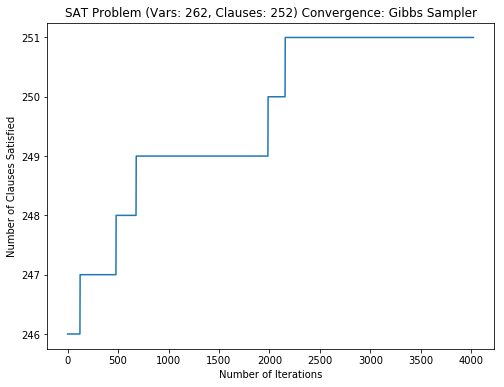

In [23]:
plt.figure(figsize=(8, 6))

plt.plot(num_c_sat_over_time)

plt.xlabel("Number of Iterations")
plt.ylabel("Number of Clauses Satisfied")
plt.title("SAT Problem (Vars: 262, Clauses: 252) Convergence: Gibbs Sampler")

plt.show()

In [24]:
# SAT problem size upper bounds
prob_sizes = {"small": 10, "med": 30, "large": 50}
lower_bounds = {"small": 1, "med": 10, "large": 30}
num_probs = 10000

In [43]:
curr_size = "large"

In [44]:
# convert df to sat problem
curr_sat_df = pd.read_csv(curr_size + "_sat.csv")

curr_sat_df.head()

Unnamed: 0  prob_id  x0  x1  x2  x3  x4  x5  x6  x7 ...   x40  x41  x42  \
0           0        0   0   1   0   0   0   0   1   0 ...     0    0    0   
1           1        0   0   0   0   0   0   0   0   1 ...     0    0    0   
2           2        0   0   0   0   0   0   0   0   0 ...     0    0    0   
3           3        0   1   0   1   0   0   0   1   0 ...     0    0    0   
4           4        0   0   0   0   0   0   1   0   0 ...     0    0    0   

   x43  x44  x45  x46  x47  x48  x49  
0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0  
3    0    0    0    0    0    0    0  
4    0    0    0    0    0    0    0  

[5 rows x 52 columns]

In [45]:
probs = {}
prev_prob_id = -1
for row_i in range(len(curr_sat_df)):
    curr_row = curr_sat_df.iloc[row_i, ]
    prob_id = curr_row.prob_id
    if prob_id != prev_prob_id:
        Variable.reset_id()
        all_vars = []
        for i in range(prob_sizes[curr_size]):
            all_vars.append(Variable(1))
    clause_list = []
    for col in list(curr_sat_df.columns):
        if col[0] == 'x':
            if curr_row[col] == 0:
                continue
            elif curr_row[col] == 1:
                val = 0
            else:
                val = 1
            tup = (all_vars[int(col[1])], val)
            clause_list.append(tup)
    new_clause = Clause(clause_list)
    if prob_id in probs:
        probs[prob_id].append(new_clause)
    else:
        probs[prob_id] = [new_clause]
probs_list = []
for k, v in probs.items():
    probs_list.append(SAT(set(v)))
print(probs_list[0])

{(x1, True) or (x3, True)}
{(x5, True) or (~x6, False) or (~x7, False) or (~x1, False) or (x2, True) or (~x2, False) or (~x3, False)}
{(x5, True) or (~x1, False) or (~x1, False) or (x2, True) or (~x3, False) or (x3, True)}
{(~x6, False) or (x8, True) or (x1, True) or (x1, True) or (x1, True) or (~x1, False) or (x2, True) or (~x3, False) or (x3, True)}
{(~x2, False) or (x1, True) or (x2, True)}
{(x1, True) or (~x1, False) or (x1, True) or (~x1, False) or (~x2, False) or (~x2, False) or (~x2, False) or (~x3, False)}
{(~x0, False) or (x1, True) or (x8, True) or (~x9, False) or (x1, True) or (x1, True) or (~x2, False) or (x2, True) or (~x3, False) or (~x3, False) or (~x3, False)}
{(~x9, False) or (x2, True)}
{(~x6, False) or (~x1, False) or (x2, True) or (x2, True) or (x3, True)}
{(x1, True) or (x1, True) or (~x2, False)}
{(x4, True) or (~x5, False) or (x1, True) or (x2, True) or (x2, True) or (~x3, False) or (x3, True) or (x3, True)}
{(~x2, False) or (x3, True) or (~x3, False)}
{(~x1, Fal

In [46]:
solved_count = 0
unsolved_count = 0
c_sat_list = []

for p in probs_list:
    new_s, sat_solved, curr_c_sat = gibbs_solver(p, 10000)
    c_sat_list.append(curr_c_sat)
    print(solved_count + unsolved_count, sat_solved)
    if sat_solved: solved_count += 1
    else: unsolved_count += 1

print(solved_count)

0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True
16 True
17 True
18 True
19 True
20 True
21 True
22 True
23 True
24 True
25 True
26 True
27 True
28 True
29 True
30 True
31 True
32 True
33 True
34 True
35 True
36 True
37 True
38 True
39 True
40 True
41 True
42 True
43 True
44 True
45 True
46 True
47 True
48 True
49 True
50 True
51 True
52 True
53 True
54 True
55 True
56 True
57 True
58 True
59 True
60 True
61 True
62 True
63 True
64 True
65 True
66 True
67 True
68 True
69 True
70 True
71 True
72 True
73 True
74 True
75 True
76 True
77 True
78 True
79 True
80 True
81 True
82 True
83 True
84 True
85 True
86 True
87 True
88 True
89 True
90 True
91 True
92 True
93 True
94 True
95 True
96 True
97 True
98 True
99 True
100 True
101 True
102 True
103 True
104 True
105 True
106 True
107 True
108 True
109 True
110 True
111 True
112 True
113 True
114 True
115 True
116 True
117 True
118 True
119 True
120 True
121 True
122 True
123

923 True
924 True
925 True
926 True
927 True
928 True
929 True
930 True
931 True
932 True
933 True
934 True
935 True
936 True
937 True
938 True
939 True
940 True
941 True
942 True
943 True
944 True
945 True
946 True
947 True
948 True
949 True
950 True
951 True
952 True
953 True
954 True
955 True
956 True
957 True
958 True
959 True
960 True
961 True
962 True
963 True
964 True
965 True
966 True
967 True
968 True
969 True
970 True
971 True
972 True
973 True
974 True
975 True
976 True
977 True
978 True
979 True
980 True
981 True
982 True
983 True
984 True
985 True
986 True
987 True
988 True
989 True
990 True
991 True
992 True
993 True
994 True
995 True
996 True
997 True
998 True
999 True
1000 True
1001 True
1002 True
1003 True
1004 True
1005 True
1006 True
1007 True
1008 True
1009 True
1010 True
1011 True
1012 True
1013 True
1014 True
1015 True
1016 True
1017 True
1018 True
1019 True
1020 True
1021 True
1022 True
1023 True
1024 True
1025 True
1026 True
1027 True
1028 True
1029 True
1030 Tr

1763 True
1764 True
1765 True
1766 True
1767 True
1768 True
1769 True
1770 True
1771 True
1772 True
1773 True
1774 True
1775 True
1776 True
1777 True
1778 True
1779 True
1780 True
1781 True
1782 True
1783 True
1784 True
1785 True
1786 True
1787 True
1788 True
1789 True
1790 True
1791 True
1792 True
1793 True
1794 True
1795 True
1796 True
1797 True
1798 True
1799 True
1800 True
1801 True
1802 True
1803 True
1804 True
1805 True
1806 True
1807 True
1808 True
1809 True
1810 True
1811 True
1812 True
1813 True
1814 True
1815 True
1816 True
1817 True
1818 True
1819 True
1820 True
1821 True
1822 True
1823 True
1824 True
1825 True
1826 True
1827 True
1828 True
1829 True
1830 True
1831 True
1832 True
1833 True
1834 True
1835 True
1836 True
1837 True
1838 True
1839 True
1840 True
1841 True
1842 True
1843 True
1844 True
1845 True
1846 True
1847 True
1848 True
1849 True
1850 True
1851 True
1852 True
1853 True
1854 True
1855 True
1856 True
1857 True
1858 True
1859 True
1860 True
1861 True
1862 True


3407 True
3408 True
3409 True
3410 True
3411 True
3412 True
3413 True
3414 True
3415 True
3416 True
3417 True
3418 True
3419 True
3420 True
3421 True
3422 True
3423 True
3424 True
3425 True
3426 True
3427 True
3428 True
3429 True
3430 True
3431 True
3432 True
3433 True
3434 True
3435 True
3436 True
3437 True
3438 True
3439 True
3440 True
3441 True
3442 True
3443 True
3444 True
3445 True
3446 True
3447 True
3448 True
3449 True
3450 True
3451 True
3452 True
3453 True
3454 True
3455 True
3456 True
3457 True
3458 True
3459 True
3460 True
3461 True
3462 True
3463 True
3464 True
3465 True
3466 True
3467 True
3468 True
3469 True
3470 True
3471 True
3472 True
3473 True
3474 True
3475 True
3476 True
3477 True
3478 True
3479 True
3480 True
3481 True
3482 True
3483 True
3484 True
3485 True
3486 True
3487 True
3488 True
3489 True
3490 True
3491 True
3492 True
3493 True
3494 True
3495 True
3496 True
3497 True
3498 True
3499 True
3500 True
3501 True
3502 True
3503 True
3504 True
3505 True
3506 True


4234 True
4235 True
4236 True
4237 True
4238 True
4239 True
4240 True
4241 True
4242 True
4243 True
4244 True
4245 True
4246 True
4247 True
4248 True
4249 True
4250 True
4251 True
4252 True
4253 True
4254 True
4255 True
4256 True
4257 True
4258 True
4259 True
4260 True
4261 True
4262 True
4263 True
4264 True
4265 True
4266 True
4267 True
4268 True
4269 True
4270 True
4271 True
4272 True
4273 True
4274 True
4275 True
4276 True
4277 True
4278 True
4279 True
4280 True
4281 True
4282 True
4283 True
4284 True
4285 True
4286 True
4287 True
4288 True
4289 True
4290 True
4291 True
4292 True
4293 True
4294 True
4295 True
4296 True
4297 True
4298 True
4299 True
4300 True
4301 True
4302 True
4303 True
4304 True
4305 True
4306 True
4307 True
4308 True
4309 True
4310 True
4311 True
4312 True
4313 True
4314 True
4315 True
4316 True
4317 True
4318 True
4319 True
4320 True
4321 True
4322 True
4323 True
4324 True
4325 True
4326 True
4327 True
4328 True
4329 True
4330 True
4331 True
4332 True
4333 True


5066 True
5067 True
5068 True
5069 True
5070 True
5071 True
5072 True
5073 True
5074 True
5075 True
5076 True
5077 True
5078 True
5079 True
5080 True
5081 True
5082 True
5083 True
5084 True
5085 True
5086 True
5087 True
5088 True
5089 True
5090 True
5091 True
5092 True
5093 True
5094 True
5095 True
5096 True
5097 True
5098 True
5099 True
5100 True
5101 True
5102 True
5103 True
5104 True
5105 True
5106 True
5107 True
5108 True
5109 True
5110 True
5111 True
5112 True
5113 True
5114 True
5115 True
5116 True
5117 True
5118 True
5119 True
5120 True
5121 True
5122 True
5123 True
5124 True
5125 True
5126 True
5127 True
5128 True
5129 True
5130 True
5131 True
5132 True
5133 True
5134 True
5135 True
5136 True
5137 True
5138 True
5139 True
5140 True
5141 True
5142 True
5143 True
5144 True
5145 True
5146 True
5147 True
5148 True
5149 True
5150 True
5151 True
5152 True
5153 True
5154 True
5155 True
5156 True
5157 True
5158 True
5159 True
5160 True
5161 True
5162 True
5163 True
5164 True
5165 True


5890 True
5891 True
5892 True
5893 True
5894 True
5895 True
5896 True
5897 True
5898 True
5899 True
5900 True
5901 True
5902 True
5903 True
5904 True
5905 True
5906 True
5907 True
5908 True
5909 True
5910 True
5911 True
5912 True
5913 True
5914 True
5915 True
5916 True
5917 True
5918 True
5919 True
5920 True
5921 True
5922 True
5923 True
5924 True
5925 True
5926 True
5927 True
5928 True
5929 True
5930 True
5931 True
5932 True
5933 True
5934 True
5935 True
5936 True
5937 True
5938 True
5939 True
5940 True
5941 True
5942 True
5943 True
5944 True
5945 True
5946 True
5947 True
5948 True
5949 True
5950 True
5951 True
5952 True
5953 True
5954 True
5955 True
5956 True
5957 True
5958 True
5959 True
5960 True
5961 True
5962 True
5963 True
5964 True
5965 True
5966 True
5967 True
5968 True
5969 True
5970 True
5971 True
5972 True
5973 True
5974 True
5975 True
5976 True
5977 True
5978 True
5979 True
5980 True
5981 True
5982 True
5983 True
5984 True
5985 True
5986 True
5987 True
5988 True
5989 True


6712 True
6713 True
6714 True
6715 True
6716 True
6717 True
6718 True
6719 True
6720 True
6721 True
6722 True
6723 True
6724 True
6725 True
6726 True
6727 True
6728 True
6729 True
6730 True
6731 True
6732 True
6733 True
6734 True
6735 True
6736 True
6737 True
6738 True
6739 True
6740 True
6741 True
6742 True
6743 True
6744 True
6745 True
6746 True
6747 True
6748 True
6749 True
6750 True
6751 True
6752 True
6753 True
6754 True
6755 True
6756 True
6757 True
6758 True
6759 True
6760 True
6761 True
6762 True
6763 True
6764 True
6765 True
6766 True
6767 True
6768 True
6769 True
6770 True
6771 True
6772 True
6773 True
6774 True
6775 True
6776 True
6777 True
6778 True
6779 True
6780 True
6781 True
6782 True
6783 True
6784 True
6785 True
6786 True
6787 True
6788 True
6789 True
6790 True
6791 True
6792 True
6793 True
6794 True
6795 True
6796 True
6797 True
6798 True
6799 True
6800 True
6801 True
6802 True
6803 True
6804 True
6805 True
6806 True
6807 True
6808 True
6809 True
6810 True
6811 True


7545 True
7546 True
7547 True
7548 True
7549 True
7550 True
7551 True
7552 True
7553 True
7554 True
7555 True
7556 True
7557 True
7558 True
7559 True
7560 True
7561 True
7562 True
7563 True
7564 True
7565 True
7566 True
7567 True
7568 True
7569 True
7570 True
7571 True
7572 True
7573 True
7574 True
7575 True
7576 True
7577 True
7578 True
7579 True
7580 True
7581 True
7582 True
7583 True
7584 True
7585 True
7586 True
7587 True
7588 True
7589 True
7590 True
7591 True
7592 True
7593 True
7594 True
7595 True
7596 True
7597 True
7598 True
7599 True
7600 True
7601 True
7602 True
7603 True
7604 True
7605 True
7606 True
7607 True
7608 True
7609 True
7610 True
7611 True
7612 True
7613 True
7614 True
7615 True
7616 True
7617 True
7618 True
7619 True
7620 True
7621 True
7622 True
7623 True
7624 True
7625 True
7626 True
7627 True
7628 True
7629 True
7630 True
7631 True
7632 True
7633 True
7634 True
7635 True
7636 True
7637 True
7638 True
7639 True
7640 True
7641 True
7642 True
7643 True
7644 True


8378 True
8379 True
8380 True
8381 True
8382 True
8383 True
8384 True
8385 True
8386 True
8387 True
8388 True
8389 True
8390 True
8391 True
8392 True
8393 True
8394 True
8395 True
8396 True
8397 True
8398 True
8399 True
8400 True
8401 True
8402 True
8403 True
8404 True
8405 True
8406 True
8407 True
8408 True
8409 True
8410 True
8411 True
8412 True
8413 True
8414 True
8415 True
8416 True
8417 True
8418 True
8419 True
8420 True
8421 True
8422 True
8423 True
8424 True
8425 True
8426 True
8427 True
8428 True
8429 True
8430 True
8431 True
8432 True
8433 True
8434 True
8435 True
8436 True
8437 True
8438 True
8439 True
8440 True
8441 True
8442 True
8443 True
8444 True
8445 True
8446 True
8447 True
8448 True
8449 True
8450 True
8451 True
8452 True
8453 True
8454 True
8455 True
8456 True
8457 True
8458 True
8459 True
8460 True
8461 True
8462 True
8463 True
8464 True
8465 True
8466 True
8467 True
8468 True
8469 True
8470 True
8471 True
8472 True
8473 True
8474 True
8475 True
8476 True
8477 True


9218 True
9219 True
9220 True
9221 True
9222 True
9223 True
9224 True
9225 True
9226 True
9227 True
9228 True
9229 True
9230 True
9231 True
9232 True
9233 True
9234 True
9235 True
9236 True
9237 True
9238 True
9239 True
9240 True
9241 True
9242 True
9243 True
9244 True
9245 True
9246 True
9247 True
9248 True
9249 True
9250 True
9251 True
9252 True
9253 True
9254 True
9255 True
9256 True
9257 True
9258 True
9259 True
9260 True
9261 True
9262 True
9263 True
9264 True
9265 True
9266 True
9267 True
9268 True
9269 True
9270 True
9271 True
9272 True
9273 True
9274 True
9275 True
9276 True
9277 True
9278 True
9279 True
9280 True
9281 True
9282 True
9283 True
9284 True
9285 True
9286 True
9287 True
9288 True
9289 True
9290 True
9291 True
9292 True
9293 True
9294 True
9295 True
9296 True
9297 True
9298 True
9299 True
9300 True
9301 True
9302 True
9303 True
9304 True
9305 True
9306 True
9307 True
9308 True
9309 True
9310 True
9311 True
9312 True
9313 True
9314 True
9315 True
9316 True
9317 True


In [41]:
f = open("c_sat_list_" + curr_size + ".txt", "w")
f.write(str(c_sat_list))
f.close()

In [32]:
print("small solve rate", solved_count / num_probs)

small solve rate 1.0


In [42]:
print("medium solve rate", solved_count / num_probs)

medium solve rate 1.0


In [47]:
print("large solve rate", solved_count / num_probs)

large solve rate 1.0


In [7]:
factory = SAT_Factory(500, 500, 200, 200)
s = factory.generate_random_instance()

In [19]:
sat_solved, sat_vars, num_c_sat_over_time = gibbs_solver(s, 10000)
print(len(s.variables))

346


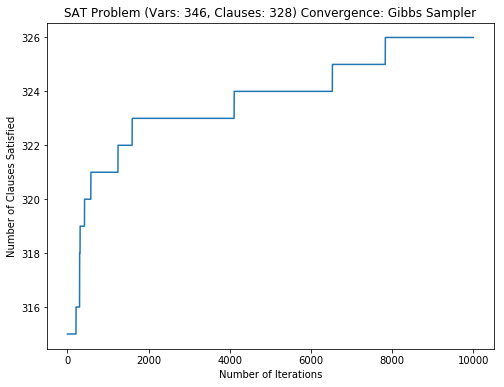

In [20]:
plt.figure(figsize=(8, 6))

plt.plot(num_c_sat_over_time)

plt.xlabel("Number of Iterations")
plt.ylabel("Number of Clauses Satisfied")
plt.title("SAT Problem (Vars: 346, Clauses: 328) Convergence: Gibbs Sampler")

plt.show()

In [21]:
s.is_satisfied()

False

In [22]:
len(s.clauses)

328